In [17]:
import tensorflow as tf

model = tf.keras.models.load_model("../models/mobilenet_model.h5")

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "../dataset/processed_images/train"
val_path = "../dataset/processed_images/validation"
test_path = "../dataset/processed_images/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 12493 images belonging to 5 classes.
Found 2248 images belonging to 5 classes.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_path = "../dataset/processed_images/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)



Found 2249 images belonging to 5 classes.


In [7]:
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

71/71 ━━━━━━━━━━━━━━━━━━━━ 32s 427ms/step - accuracy: 1.0000 - loss: 9.8046e-05
Test Loss: 9.804630826693028e-05
Test Accuracy: 1.0


71/71 ━━━━━━━━━━━━━━━━━━━━ 31s 425ms/step


c:\Users\JAYANTH R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


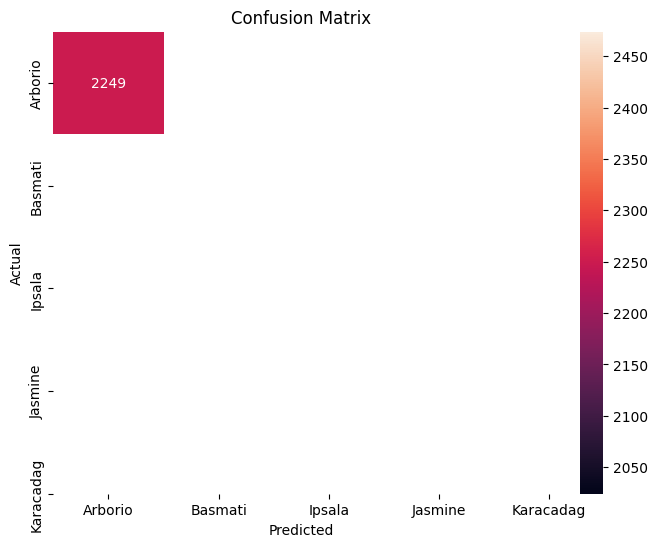

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
import numpy as np

# Generate predictions
predictions = model.predict(test_generator)

y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

print("Unique Predicted Classes:", np.unique(y_pred))
print("Unique True Classes:", np.unique(y_true))

71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 447ms/step
Unique Predicted Classes: [0]
Unique True Classes: [0]


In [21]:
import numpy as np

print("Shape of predictions:", predictions.shape)
print("Unique predicted labels:", np.unique(y_pred))
print("Unique true labels:", np.unique(y_true))
model.summary()

Shape of predictions: (2249, 5)
Unique predicted labels: [0]
Unique true labels: [0]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,599 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [23]:
print("Shape of predictions:", predictions.shape)
print("Unique predicted labels:", np.unique(y_pred))
model.summary()

Shape of predictions: (2249, 5)
Unique predicted labels: [0]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,599 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [24]:
from sklearn.metrics import classification_report
import numpy as np

test_generator.reset()

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

print(classification_report(
    y_true,
    y_pred,
    labels=[0,1,2,3,4],
    target_names=list(test_generator.class_indices.keys())
))

71/71 ━━━━━━━━━━━━━━━━━━━━ 30s 415ms/step
              precision    recall  f1-score   support

     Arborio       1.00      1.00      1.00      2249
     Basmati       0.00      0.00      0.00         0
      Ipsala       0.00      0.00      0.00         0
     Jasmine       0.00      0.00      0.00         0
   Karacadag       0.00      0.00      0.00         0

    accuracy                           1.00      2249
   macro avg       0.20      0.20      0.20      2249
weighted avg       1.00      1.00      1.00      2249



c:\Users\JAYANTH R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\JAYANTH R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\JAYANTH R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _w

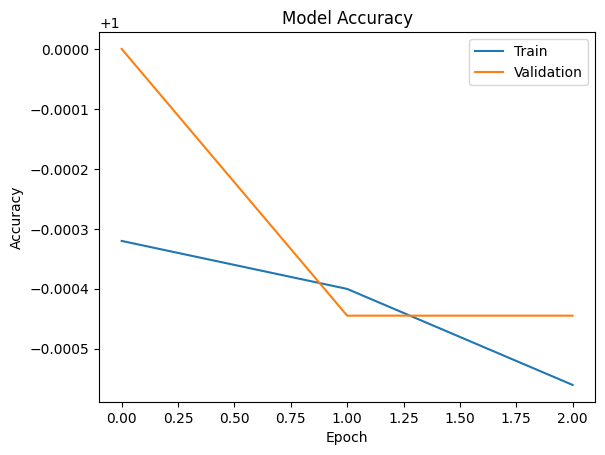

In [30]:
import pickle
import matplotlib.pyplot as plt

with open("../results/training_history.pkl", "rb") as f:
    history_data = pickle.load(f)

# Plot Accuracy
plt.plot(history_data['accuracy'])
plt.plot(history_data['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

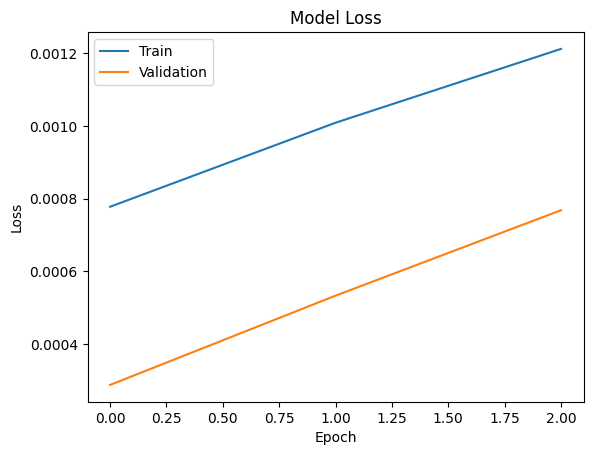

In [31]:
plt.plot(history_data['loss'])
plt.plot(history_data['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()